In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
#from datasets import Dataset
from tqdm.notebook import tqdm
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
projection_df = pd.read_csv('/content/CommitmentBank-items.csv')
projection_df.head(5)

,Unnamed: 0,uID,Verb,Embedding,Context,Target,Prompt,ModalType,MatTense,MatSubjLemma,MatSubjPer,MatSubjNum,Embedding.1,genre,factive,mean.noTarget,sd.noTarget,Mean,SD,Reponses
0,1,BNC-1,admit,conditional,Polly had to think quickly.,They were still close enough to shore for him ...,Polly was not an experienced ocean sailor,NaN,future,she,third,singular,conditional,BNC,no,-0.111111,1.269296,2.000000,0.866025,"2, 3, 3, 1, 3, 1, 2, 1, 2"
1,2,BNC-1002,say,modal,"Nevertheless, life went on as it always does. ...",Indeed it could be said that they had prospered.,the Kiwi Keith and the Mackenzie houses had pr...,CI,present,it,third,singular,modal,BNC,no,1.200000,1.873796,1.875000,0.834523,"2, 1, 3, 1, 2, 2, 3, 1"
2,3,BNC-1003,say,modal,"He patted her hand. If he had chosen to, Thoma...",He might have said to her that some time in th...,some time in the middle of the nineteenth cent...,AB,present,he,third,singular,modal,BNC,no,-0.250000,0.462910,0.666667,1.154701,"2, 0, 1, 0, 0, 3, -1, 0, 1, 0, 0, 2"
3,4,BNC-1005,say,modal,She could see his distorted image in the slant...,Of course she could say it was for the childre...,it was for the children,AB,future,she,third,singular,modal,BNC,no,0.636364,1.120065,0.875000,0.991031,"2, 1, 0, 1, -1, 1, 1, 2"
4,5,BNC-1006,say,modal,"She glanced around the room, laying her hot fl...",Robyn swallowed and took a deep breath trying ...,it was all right,AB,future,she,third,singular,modal,BNC,no,-1.090909,1.044466,0.000000,2.309401,"3, 1, -2, -3, -3, 3, 2, 1, -1, -1"


In [3]:
projection_df.groupby(['Verb', 'Embedding.1']).mean('Mean')['Mean'].unstack()[['conditional', 'modal', 'negation', 'question']].dropna()

Embedding.1,conditional,modal,negation,question
Verb,,,,
admit,2.000000,1.754630,-0.222222,0.555556
assume,0.666667,0.923160,0.076923,-0.895833
believe,-0.908333,1.053363,-0.307055,-1.145229
feel,0.385417,1.247917,-1.494121,-0.060185
find,0.796296,1.150309,-1.888889,0.804293
hear,1.138889,1.677778,-0.141667,0.500000
imagine,-1.319444,-0.296627,-0.069676,-1.555556
know,1.318448,1.658520,0.297233,1.990079
mean,1.038194,0.799405,-1.156705,0.424603


In [4]:
projection_df.groupby(['Verb', 'Embedding.1']).mean('Mean')['Mean'].unstack()[['conditional', 'modal', 'negation', 'question']].dropna().mean()

,0
Embedding.1,
conditional,0.451104
modal,1.252144
negation,-0.344412
question,0.135997


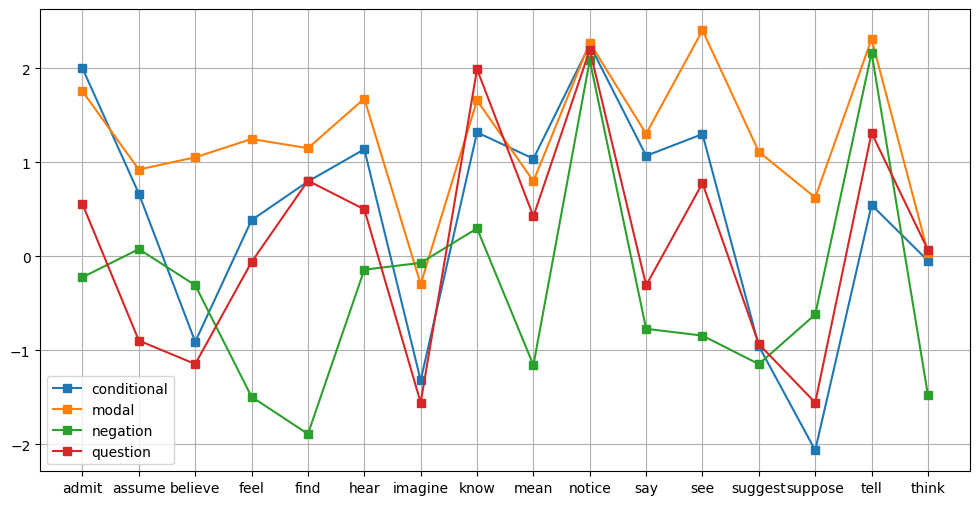

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(projection_df.groupby(['Verb', 'Embedding.1']).mean('Mean')['Mean'].unstack()[['conditional', 'modal', 'negation', 'question']].dropna(),
         label=['conditional', 'modal', 'negation', 'question'], marker = 's')

plt.legend()
plt.xticks()
plt.grid()
plt.show()